# Features importances and visualization with SHAP (SHapley Additive exPlanations)

 The objective of this notebook is to get information about the contributions of the features. It can lead to interesting insights, like if we need to reduce the number of features our dataset have, how we decrease, etc.

 For this, we are going to use all we got until now: models with the best parameters that were trained with the full dataset, best 100 features dataset and best 50 features dataset.


 Note: For this to work, we need to pass the data scaled for the SHAP, because we cant pass the pipelined model, only the model itself contained in the last step of the pipe, for example. LR = (LogisticRegression.pkl)[-1]

In [9]:
#-------Utilities----------------
import shap
import pandas as pd
import numpy as np
import pickle

#-------Visualization----------#
import matplotlib.pyplot as plt

#-------Scaling----------------#
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#-------Data-------------------
# Full data base
with open('data_base.pkl', 'rb') as f:
    data_base = pickle.load(f)
# Best 100 features
best_100 = pd.read_csv('best_features/LogisticRegression_100.csv')
# Best 50 features
best_50 = pd.read_csv('best_features/LogisticRegression_50.csv')

#-------Models------------------
# models trainned with full data base
with open('models/LogisticRegression.pkl', 'rb') as f:
    LR = pickle.load(f)
with open('models/LinearSVC.pkl', 'rb') as f:
    LSVC = pickle.load(f)
with open('models/GradientBoostingClassifier.pkl', 'rb') as f:
    GBC = pickle.load(f)
with open('models/RandomForestClassifier.pkl', 'rb') as f:
    RF = pickle.load(f)

# models trainned with best 100 features
with open('models_2/LogisticRegression_100.pkl', 'rb') as f:
    LR_100 = pickle.load(f)
with open('models_2/LinearSVC_100.pkl', 'rb') as f:
    LSVC_100 = pickle.load(f)
with open('models_2/GradientBoostingClassifier_100.pkl', 'rb') as f:
    GBC_100 = pickle.load(f)
with open('models_2/RandomForestClassifier_100.pkl', 'rb') as f:
    RF_100 = pickle.load(f)

# models trainned with best 50 features
with open('models_2/LogisticRegression_50.pkl', 'rb') as f:
    LR_50 = pickle.load(f)
with open('models_2/LinearSVC_50.pkl', 'rb') as f:
    LSVC_50 = pickle.load(f)
with open('models_2/GradientBoostingClassifier_50.pkl', 'rb') as f:
    GBC_50 = pickle.load(f)
with open('models_2/RandomForestClassifier_50.pkl', 'rb') as f:
    RF_50 = pickle.load(f)



Getting our X and y data

In [2]:
info_cols = ['date',
 'home_team',
 'away_team',
 'season',
 'home_win' ]
X = data_base.drop(info_cols, axis=1)
y = data_base['home_win']

#X and y shape
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (2027, 264)
y shape:  (2027,)


In [3]:
# Initialize JavaScript visualization
shap.initjs()

## Linear Regression SHAP values

In [4]:
# Scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# returnig to dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,home_rolling_fg,home_rolling_fga,home_rolling_fg%,home_rolling_3p,home_rolling_3pa,home_rolling_3p%,home_rolling_ft,home_rolling_fta,home_rolling_ft%,home_rolling_orb,...,away_rolling_opponent_drb%_max,away_rolling_opponent_trb%_max,away_rolling_opponent_ast%_max,away_rolling_opponent_stl%_max,away_rolling_opponent_blk%_max,away_rolling_opponent_tov%_max,away_rolling_opponent_usg%_max,away_rolling_opponent_ortg_max,away_rolling_opponent_drtg_max,away_rolling_opponent_Total
0,1.171954,-0.455332,1.530733,-0.242996,-0.802644,0.511868,0.165988,0.321821,-0.410380,-0.521061,...,-0.226904,-0.142992,0.014645,-0.463457,-0.535915,0.818837,-0.383223,0.572141,0.056718,1.279552
1,1.610837,0.371182,1.512520,1.883813,1.012125,1.679623,-0.496329,-0.018314,-1.045001,-0.812586,...,-0.182705,-0.150315,0.908783,0.833711,-1.001114,1.839667,-0.930405,-0.430788,-1.977322,-1.594831
2,1.422744,0.887753,0.911518,0.229628,0.278495,0.025682,0.768094,0.661956,0.227671,-0.909760,...,0.740274,-0.175947,2.817676,-0.329267,-1.220346,0.848862,-0.357167,-0.794595,-1.328788,-0.769777
3,0.168792,0.009582,0.091968,0.623481,0.741840,-0.078825,0.647673,0.224639,1.147014,-1.395634,...,0.906671,0.051075,0.935004,-0.481349,1.036138,1.813396,-0.878293,0.247664,0.439943,0.614185
4,1.171954,1.352668,0.395505,-0.085455,-0.030402,-0.010668,0.948726,1.536590,-0.959242,-0.229537,...,1.044468,0.032767,-0.331473,-0.749729,-0.370154,-0.160709,0.880506,1.476744,-0.149634,-0.503630


In [5]:
# Create SHAP explainer
explainer = shap.LinearExplainer(LR[-1], X_scaled, seed=42)
shap_values = explainer.shap_values(X_scaled)

We know that the home_rolling_+/-_max is amongst the top 2 features most important. Lets visualize the dependence level with 3 of the most impactigul feature on this. We can get the insight of what are the features that impacts the most on this variable.

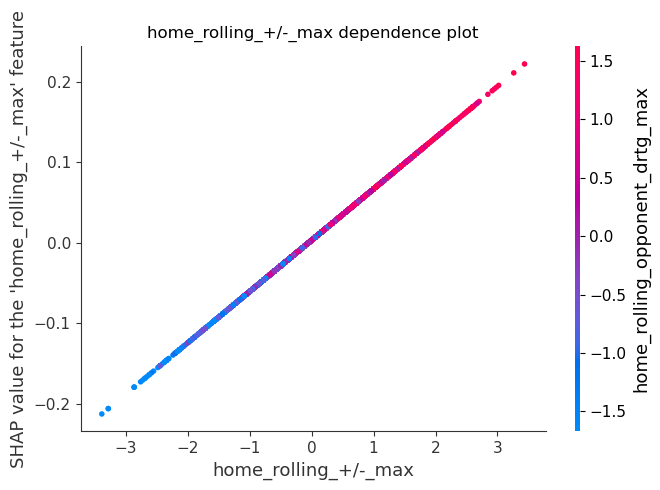

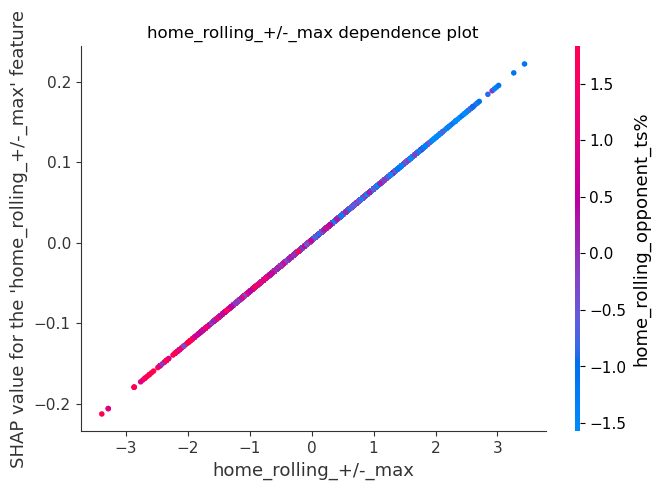

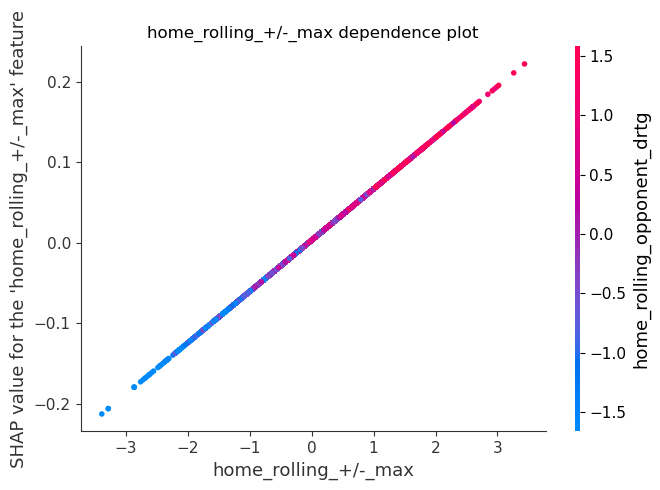

In [11]:
# we can use shap.approximate_interactions to guess which features
# may interact with age
inds = shap.approximate_interactions('home_rolling_+/-_max', shap_values, X_scaled)

# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot('home_rolling_+/-_max', shap_values, X_scaled, interaction_index=inds[i], show=False)
    plt.title("home_rolling_+/-_max dependence plot")
    plt.ylabel("SHAP value for the 'home_rolling_+/-_max' feature")
    plt.show()

Top contributions for the model output

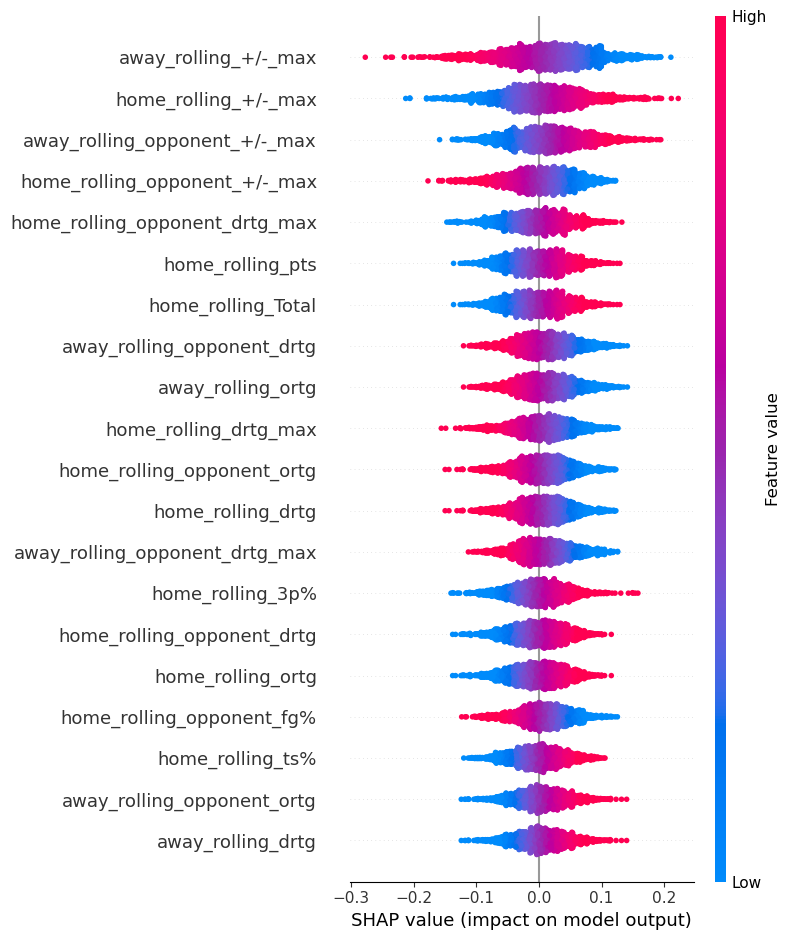

In [13]:
shap.summary_plot(shap_values, X_scaled)

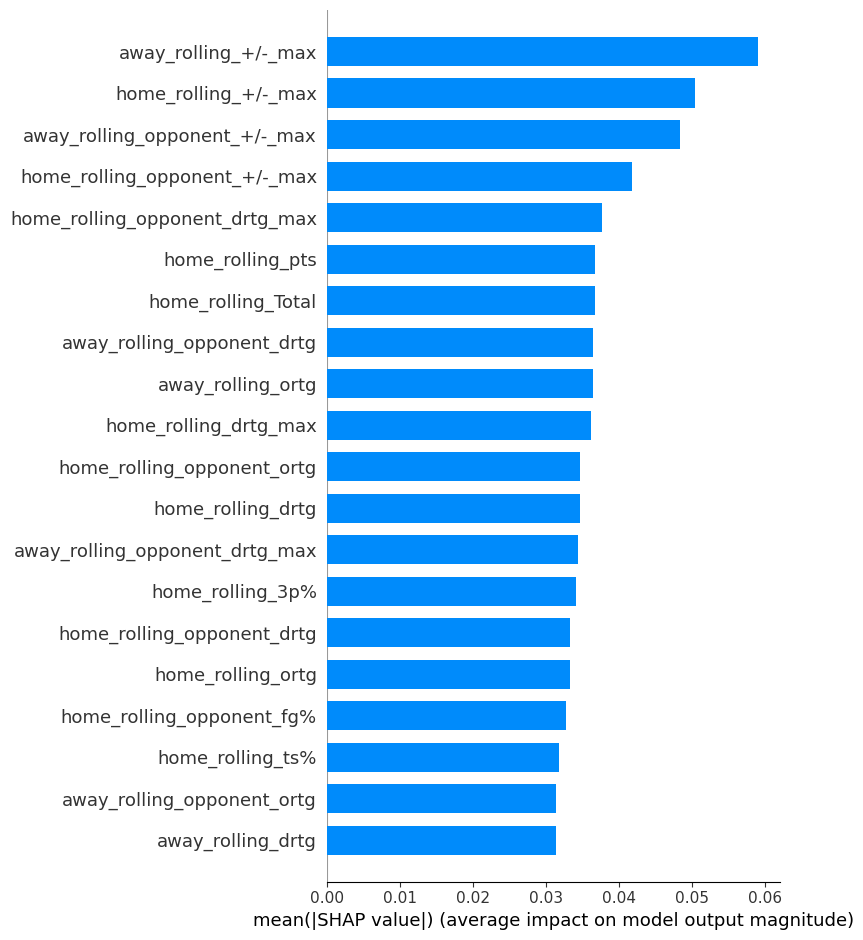

In [14]:
shap.summary_plot(shap_values, X_scaled, plot_type="bar")

## Conclusion

We can see, as we saw in notebook 3 on models development, that the top features aways has the top performing player on the game presence. 